In [3]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4:  Numerical Differentiation and Quadrature

## Question 1 - Fundamental Theorem of Calculus

**(a)** (15) Write a function that computes the integral of the derivative 

$$I[f] = \int^x_0 f'(\hat{x}) d\hat{x}$$

and returns the error from the expected calculation.  Use a second order accurate centered difference scheme and then a left-hand rule to compute the absolute error.  In this case the left-hand quadrature is

$$Q[f] = f(x_i) \Delta x$$

The function should take in $x$ values and the function $f(x)$ and return a vector of the **errors** for each value $x$ given.

In [4]:
def int_diff_error(x, f):
    ### INSERT CODE HERE
    #raise NotImplementedError("Replace this statement with your solution.")
    delta_x = x[1] - x[0]
    #compute derivative
    f_prime_hat = numpy.empty(x.shape[0])
    f_prime_hat[1:-1] = (f(x[2:]) - f(x[:-2])) / (2 * delta_x)
    # Use first-order differences for points at edge of domain
    f_prime_hat[0] = (f(x[1]) - f(x[0])) / delta_x     # Forward Difference at x_0
    f_prime_hat[-1] = (f(x[-1]) - f(x[-2])) / delta_x  # Backward Difference at x_N
    #compute left-hand integral
    Qf = numpy.empty(x.shape[0])
    Qf[0] = f(x[0]) # Cumulative integral
    for i in xrange(1, x.shape[0]):
        Qf[i] = Qf[i - 1] + f_prime_hat[i] * delta_x
    #plt.plot(x,f(x),'r',x,Qf,'b')
    error = abs(Qf - f(x))
    return error

In [5]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print numpy.max(int_diff_error(x, f))
numpy.testing.assert_allclose(int_diff_error(x, f), numpy.zeros(500), atol=1e-2)
print "Successful FTC evaluation."

0.00630641614566
Successful FTC evaluation.


**(b)** (15) Compute the same as above except reverse the order of the operations, i.e.

$$D[f] = \frac{\text{d}}{\text{d}x} \int^x_0 f(\hat{x}) d\hat{x}$$


In [6]:
def diff_int_error(x, f):
    ### INSERT CODE HERE
    #raise NotImplementedError("Replace this statement with your solution.")
    delta_x = x[1] - x[0]
    #compute left-hand integral
    f_integral = numpy.empty(x.shape[0])
    f_integral[0] = f(x[0]) # Cumulative integral
    for i in xrange(1, x.shape[0]):
        f_integral[i] = f_integral[i - 1] + f(x[i]) * delta_x
    #compute derivative
    Df = numpy.empty(x.shape[0])
    #print Df[-1]
    Df[1:-1] = (f_integral[2:] - f_integral[:-2]) / (2 * delta_x)
    # Use first-order differences for points at edge of domain
    Df[0] = (f_integral[1] - f_integral[0]) / delta_x     # Forward Difference at x_0
    Df[-1] = (f_integral[-1] - f_integral[-2]) # Backward Difference at x_N
    #plt.plot(x,f(x),'r',x,Df,'b')
    error = abs(f(x) - Df)
    return error

In [7]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print numpy.max(diff_int_error(x, f))
numpy.testing.assert_allclose(diff_int_error(x, f), numpy.zeros(500), atol=1e-2)
print "Successful FTC evaluation."

0.00988114843548
Successful FTC evaluation.


**(c)** (10) Plot the convergence rate for the number of partitions `N = [10,100,200,300,400,500]` on a `loglog` plot by computing the norm over the error given for each $N$ by using the `numpy.linalg.norm` command with `ord=2` vs. the $\Delta x$ used.  Theorize about what you observe regarding the order of convergence.

By definition, the infinite-order norm over a vector is the maximum element value. $$||\vec x||_ \infty = max(\vec x)$$

The second-order norm over a vector is $$||\vec x||_2 = \sqrt{x_1^2 + x_2^2 + ... + x_n^2}$$

We can see $||\vec x||_ \infty = \sqrt{x_{i}^2}$, where $x_i$ is the max value.

So $$||\vec x||_2 = \sqrt{x_1^2 + x_2^2 + ... + x_n^2} > \sqrt{x_{i}^2} = ||\vec x||_ \infty$$

Therefore, second order norm deviates from the first order convergence line as $\Delta x$ decreases.

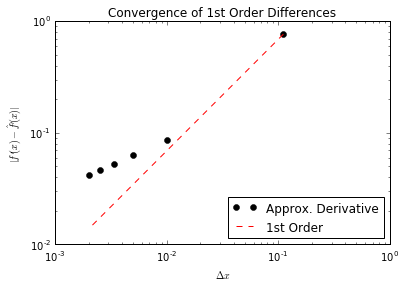

In [8]:
### INSERT CODE HERE
#raise NotImplementedError("Replace this statement with your solution.")
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
# Compute the error as a function of delta_x
delta_x = []
error = []
# for N in xrange(2, 101):
partitions = numpy.array([10, 100,200,300,400,500])
for N in partitions:
    x_hat = numpy.linspace(0.0, 1., N)
    delta_x.append(x_hat[1] - x_hat[0])
    error.append(numpy.linalg.norm(int_diff_error(x_hat, f), ord=2))
    
error = numpy.array(error)
delta_x = numpy.array(delta_x)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error, 'ko', label="Approx. Derivative")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'r--', label="1st Order")
#axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.legend(loc=4)
axes.set_title("Convergence of 1st Order Differences")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(x) - \hat{f}'(x)|$")

plt.show()

## Question 2 - Quadrature

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.

**(a)** (10) Write a function that computes both integrals using the  trapezoidal rule with N partitions of equal length "ignoring" the singularity at $x=0$ by setting integrands to 0.

In [9]:
def trap_1(N):
    ### INSERT CODE HERE
    #raise NotImplementedError("Replace this statement with your solution.")
    #Define Fresnel functions
    c = lambda x: numpy.cos(x) / numpy.sqrt(x)
    s = lambda x: numpy.sin(x) / numpy.sqrt(x)
    
    num_partitions = N    
    x_hat = numpy.linspace(0.0, 1.0, num_partitions + 1)
    delta_x = x_hat[1] - x_hat[0]
    Is = (s(x_hat[1])) * delta_x / 2.0
    Ic = (c(x_hat[1])) * delta_x / 2.0
    for i in xrange(1, num_partitions):
        Is += (s(x_hat[i + 1]) + s(x_hat[i])) * delta_x / 2.0
        Ic += (c(x_hat[i + 1]) + c(x_hat[i])) * delta_x / 2.0
    return Is, Ic

In [10]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_1(200)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print "Computed the integrals correctly using the trapezoidal rule only."    

Error: 7.32497950293e-05
Computed the integrals correctly using the trapezoidal rule only.


**(b)** (10) A weighted Newton-Cotes quadrature rule is a modification of our version of Newton-Cotes quadrature except that we also multiply by a weighting function such that

$$\int^1_0 w(x) f(x) dx = \sum^{N}_{i=1} w_i f(x_i)$$

For the weight $x^{-1/2}$ we can show that 

$$\int^1_0 \frac{f(x)}{\sqrt{x}} dx \approx \frac{2}{3} (2 f(0) + f(1))$$

Combining this formula with the trapezoidal rule approach above, evaluate the integrals again by using the trapezoid rule except for the partition $[0,\Delta x]$ that involves the singularity use the above weighted Newton-Cotes rule.  Note that you will have to map the rule to the partition.

In [11]:
def trap_wnc(N):
    ### INSERT CODE HERE
    #raise NotImplementedError("Replace this statement with your solution.")
    #Define Fresnel functions
    c = lambda x: numpy.cos(x) / numpy.sqrt(x)
    s = lambda x: numpy.sin(x) / numpy.sqrt(x)
    
    num_partitions = N    
    x_hat = numpy.linspace(0.0, 1.0, num_partitions + 1)
    delta_x = x_hat[1] - x_hat[0]
    #mapping from [0, 1] to [0 delta_x]
    xi_map = lambda a,b,xi : (b - a) * xi
    #use the Newton-Cotes to compute the initial value
    Is = (4.0 / 3.0 * numpy.sin(xi_map(0.0, delta_x, 0.0)) + 2.0 / 3.0 * numpy.sin(xi_map(0.0, delta_x, 1.0))) * delta_x ** 0.5
    Ic = (4.0 / 3.0 * numpy.cos(xi_map(0.0, delta_x, 0.0)) + 2.0 / 3.0 * numpy.cos(xi_map(0.0, delta_x, 1.0))) * delta_x ** 0.5
    for i in xrange(1, num_partitions):
        Is += (s(x_hat[i + 1]) + s(x_hat[i])) * delta_x / 2.0
        Ic += (c(x_hat[i + 1]) + c(x_hat[i])) * delta_x / 2.0
    return Is, Ic

In [12]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_wnc(200)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print "Computed the integrals correctly using the trapezoidal and Newton-Cotes rules."    

Error: 1.43244754534e-05
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(c)** (10) Do a change of variables $x = t^2$ and evaluate each integral using the trapezoidal rule for the entire domain.

In [13]:
def trap_transformed(N):
    ### INSERT CODE HERE
    #raise NotImplementedError("Replace this statement with your solution.")
    #Define Fresnel function with new varialbe t
    c = lambda t: 2.0 * numpy.cos(t**2.0) 
    s = lambda t: 2.0 * numpy.sin(t**2.0)
    
    num_partitions = N    
    x_hat = numpy.linspace(0.0, 1.0, num_partitions + 1)
    delta_x = x_hat[1] - x_hat[0]
    Is = (s(x_hat[1])) * delta_x / 2.0 #ignore singular point x_hat[0]
    Ic = (c(x_hat[1])) * delta_x / 2.0
    for i in xrange(1, num_partitions):
        Is += (s(x_hat[i + 1]) + s(x_hat[i])) * delta_x / 2.0
        Ic += (c(x_hat[i + 1]) + c(x_hat[i])) * delta_x / 2.0
    return Is, Ic

In [14]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_transformed(200)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-5)
print "Computed the integrals correctly using the trapezoidal rule."    

Error: 4.50254425055e-06
Computed the integrals correctly using the trapezoidal rule.


**(d)** (10) Do the same as in part (c) but use 3-point Gauss-Legendre quadrature.

In [15]:
def gauss_legendre_3(N):
    ### INSERT CODE HERE
    #raise NotImplementedError("Replace this statement with your solution.")
    #define Fresnel integrals
    c = lambda t: 2.0 * numpy.cos(t**2.0) 
    s = lambda t: 2.0 * numpy.sin(t**2.0)
    
    num_partitions = N    
    x_hat = numpy.linspace(0.0, 1.0, num_partitions + 1)
    delta_x = x_hat[1] - x_hat[0]
    # 3-point Gauss-Legendre
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(3.0 / 5.0), 0.0, numpy.sqrt(3.0 / 5.0)]
    w = [5.0 / 9.0, 8.0 / 9.0, 5.0 / 9.0]
    
    Is = 0
    Ic = 0
    for i in xrange(0, num_partitions):
        for k in xrange(len(xi)):
            Is += (s(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k])
            Ic += (c(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k])
    Ic *= delta_x / 2.0
    Is *= delta_x / 2.0
    
    return Is, Ic

In [16]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = gauss_legendre_3(10)
error = numpy.abs(Is_hat - Is)
print "Error: %s" % error
numpy.testing.assert_allclose(error, 0.0, atol=1e-10)
print "Computed the integrals correctly using the trapezoidal and Newton-Cotes rules."    

Error: 8.57063309212e-11
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(e)** (10) Check the order of accuracy for each of the methods above and plot these on a `loglog` plot with appropriate reference lines to indicate the order of each.

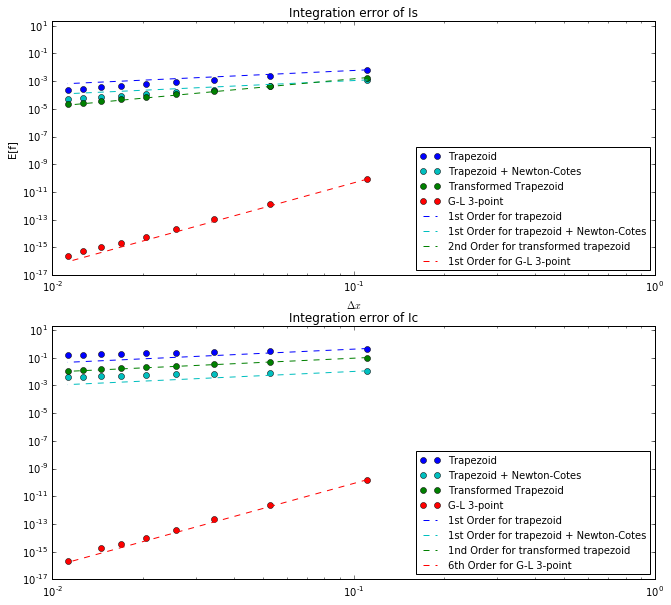

In [18]:
### INSERT CODE HERE
#raise NotImplementedError("Replace this statement with your solution.")
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)

num_partitions = range(10, 100, 10)
delta_x = numpy.empty(len(num_partitions))
error_trap = numpy.empty((2, len(num_partitions)))
error_newton = numpy.empty((2, len(num_partitions)))
error_transformed = numpy.empty((2, len(num_partitions)))
error_3 = numpy.empty((2, len(num_partitions)))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N)
    delta_x[j] = x_hat[1] - x_hat[0]
    # Compute trapezoid
    Is_hat, Ic_hat = trap_1(N)
    error_trap[0, j] = numpy.abs(Is - Is_hat)
    error_trap[1, j] = numpy.abs(Ic - Ic_hat)
    # Compute trapezoid with Newton-Cotes 
    Is_hat, Ic_hat = trap_wnc(N)
    error_newton[0, j] = numpy.abs(Is - Is_hat)
    error_newton[1, j] = numpy.abs(Ic - Ic_hat)
    #Compute transformed trapezoid
    Is_hat, Ic_hat = trap_transformed(N)
    error_transformed[0, j] = numpy.abs(Is - Is_hat)
    error_transformed[1, j] = numpy.abs(Ic - Ic_hat)
    # Compute Gauss-Legendre 3-point
    Is_hat, Ic_hat = gauss_legendre_3(N)
    error_3[0, j] = numpy.abs(Is - Is_hat)
    error_3[1, j] = numpy.abs(Ic - Ic_hat)


fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 1.8)
fig.set_figheight(fig.get_figheight() * 2.5)
axes = fig.add_subplot(2, 1, 1)
axes_2 = fig.add_subplot(2, 1, 2)

#Plot Is
axes.loglog(delta_x, error_trap[0,:], 'bo', label="Trapezoid")
axes.loglog(delta_x, error_newton[0,:], 'co', label="Trapezoid + Newton-Cotes")
axes.loglog(delta_x, error_transformed[0,:], 'go', label="Transformed Trapezoid")
axes.loglog(delta_x, error_3[0,:], 'ro', label="G-L 3-point")
#Determinte order of convergence Is
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error_trap[0,0], 1.0) * delta_x**1.0, 'b--', label="1st Order for trapezoid")
axes.loglog(delta_x, order_C(delta_x[0], error_newton[0,0], 1.0) * delta_x**1.0, 'c--', label="1st Order for trapezoid + Newton-Cotes")
axes.loglog(delta_x, order_C(delta_x[0], error_transformed[0,0], 2.0) * delta_x**2.0, 'g--', label="2nd Order for transformed trapezoid")
axes.loglog(delta_x, order_C(delta_x[0], error_3[0,0], 6.0) * delta_x**6.0, 'r--', label="1st Order for G-L 3-point")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("E[f]")
axes.set_title("Integration error of Is")
axes.legend(loc=4,prop={'size':10})
axes.set_ylim((1e-17,2e1))
#Plot Ic
axes_2.loglog(delta_x, error_trap[1,:], 'bo', label="Trapezoid")
axes_2.loglog(delta_x, error_newton[1,:], 'co', label="Trapezoid + Newton-Cotes")
axes_2.loglog(delta_x, error_transformed[1,:], 'go', label="Transformed Trapezoid")
axes_2.loglog(delta_x, error_3[1,:], 'ro', label="G-L 3-point")
#Determinte order of convergence for Ic
axes_2.loglog(delta_x, order_C(delta_x[0], error_trap[1,0], 1.0) * delta_x**1.0, 'b--', label="1st Order for trapezoid")
axes_2.loglog(delta_x, order_C(delta_x[0], error_newton[1,0], 1.0) * delta_x**1.0, 'c--', label="1st Order for trapezoid + Newton-Cotes")
axes_2.loglog(delta_x, order_C(delta_x[0], error_transformed[1,0], 1.0) * delta_x**1.0, 'g--', label="1nd Order for transformed trapezoid")
axes_2.loglog(delta_x, order_C(delta_x[0], error_3[1,0], 6.0) * delta_x**6.0, 'r--', label="6th Order for G-L 3-point")
axes_2.set_title("Integration error of Ic")
axes_2.legend(loc=4,prop={'size':10})
axes_2.set_ylim((1e-17,2e1))
axes.set_xlabel("$\Delta x$")
plt.show()

**(f)** (10) Comment on the results of this question and the vast differences in convergence rates even between the two integrations (why is $I_c$ less accurate than $I_s$).

1. Trapezoid is better than 1st order convergence in Is, and is worse than 1st order in Cs. It's error is the biggest, because it just ignore the initial value of the Fresnel function.

2. Trapezoid with Newton-Cotes is better because the initial value is included. It's slope is exactly same as pure trapezoid, because they are based on identical method except for the initial value.

3. Transformed Trapezoid is second order convergence, because it does not have sigularity problems. So the error is not affected given x near 0.

4. Gauss-Legendre 3-point has the best error and convergence order. And there is no evident difference between Ic and Is.

Only transformed trapezoid follows the convergence line very well, because it does not have the $\frac {1}{\sqrt {x}}$. Other methods have some sigularity probelm when $\Delta x$ is very small. 

Trapezoid, trepizoid with Newton-Cotes and Gauss-Legendre 3-point have smaller error for Is compared to Ic. The reason is that $ I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx $. $sin(\Delta x)$ approches to $\Delta x$ when $\Delta x \rightarrow 0$. Therefore, $\frac{\sin x}{\sqrt{x}} = \frac{\Delta x}{\sqrt{\Delta x}} = \sqrt{\Delta x}$. The effect of sigularity is compensated.

However, in $I_c = \int^1_0 \frac{\cos x}{\sqrt{x}}$, term $\lim_{x \rightarrow 0} \cos x \rightarrow 1$. So sigularity problem is not compensated.

There are great differences in convergence rates for Trapezoid, Trapezoid with Newton-Cotes method. Hence trapezoid algorithm must have problem dealing with singularity points.